### **Máquinas de vectores de soporte (SVM)**

Se utilizan principalmente en problemas de clasificación. El objetivo principal de una `SVM` es encontrar el hiperplano en un espacio de múltiples dimensiones que mejor separa las distintas clases de datos. <br /><br />
Un hiperplano es una subvariedad de un espacio de mayor dimensión (en un espacio tridimensional, sería un plano; en un espacio bidimensional, sería una línea).

`EJEMPLOS DE USO:`<br />
Clasificación de Imágenes: Una SVM puede ser entrenada para distinguir entre diferentes tipos de objetos en imágenes.<br>

Por ejemplo, se puede entrenar una SVM para clasificar imágenes de gatos y perros utilizando características extraídas de las imágenes, como texturas y formas. <br>
Con este mismo enfoque podemos tambièn realizar reconocimienot facial

In [ ]:
!pip3 install numpy pandas matplotlib scikit-learn opencv-python

In [7]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import Bunch

In [2]:
# Cargar el conjunto de imágenes de muestra
# Podemos intentar con distintos datasets que vienen integrados en sklearn
# siempre y cuando regrese una lista 
from sklearn.datasets import load_sample_images

dataset = load_sample_images()
images = dataset.images

# Función para extraer características de una imagen
# Aquí dividimos la imagen en una cuadrícula con la cual vamos a obtener los colores
# para ir identificando regiones o características
def extract_features(image, grid_size=(10, 10)):
    height, width, _ = image.shape
    features = []
    for row in range(0, height, grid_size[0]):
        for col in range(0, width, grid_size[1]):
            region = image[row:row + grid_size[0], col:col + grid_size[1]]
            avg_color = np.mean(region, axis=(0, 1))
            features.append(avg_color)
    return np.array(features)

# Extraer características de las imágenes
X = []
y = []
for idx, image in enumerate(images):
    features = extract_features(image)
    X.append(features)
    y.append(np.full(features.shape[0], idx))  # Etiquetamos cada región de la imagen con el índice de la imagen

# Convertir listas a arrays numpy
X = np.vstack(X)
y = np.concatenate(y)

# print(X)
# print(y)

In [3]:
# Dividir en conjuntos de entrenamiento y prueba
# X variables que se usarán para la predicción
# y variable que queremos predecir
# test_size=0.2: indica que usaremos el 20% de los datos para el conjunto de prueba y el 80% para el conjunto de entrenamiento
# Conjunto de entrenamiento se usa para entrenar el modelo, se usa para enseñar al modelo la relacion entre los patrones en los datos (mientras mas, mejor)
# Conjunto de prueba se usa para comparar las predicciones y ver que tan acertadas son
# random_state: se utiliza para controlar cómo se dividen los datos aleatorios. Si dos personas ejecutan la misma función con el mismo valor para random_state, 
#   obtendrán exactamente la misma división de datos (pruebas y entrenamiento).
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo SVM
# linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# Hacer predicciones
y_pred = svm.predict(X_test)

In [5]:
# Evaluar el modelo

# Matriz de confusion
# TP (True Positives): Las predicciones correctas donde el modelo predice la clase positiva correcta.
# FP (False Positives): Las predicciones incorrectas donde el modelo predice la clase positiva pero la instancia es negativa.
# FN (False Negatives): Las predicciones incorrectas donde el modelo predice la clase negativa pero la instancia es positiva.
# TN (True Negatives): Las predicciones correctas donde el modelo predice la clase negativa correcta.

#                  Predicción Positiva	   Predicción Negativa
# Clase Positiva	        TP	                      FN
# Clase Negativa	        FP                        TN
print("Mátriz de confusión")
print(confusion_matrix(y_test, y_pred))

# Precisión (Precision): La proporción de verdaderos positivos sobre el total de predicciones positivas (TP / (TP + FP)).
# Cobertura (Recall): La proporción de verdaderos positivos sobre el total de instancias verdaderamente positivas (TP / (TP + FN)).
# F1 Score: La media armónica de precisión y cobertura, proporcionando un balance entre ambas métricas (2 * (Precision * Recall) / (Precision + Recall)).
# Soporte (Support): El número de ocurrencias reales de la clase en los datos.
print("Clasificación de reporte")
print(classification_report(y_test, y_pred))

Mátriz de confusión
[[809  30]
 [ 44 769]]
Clasificación de reporte
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       839
           1       0.96      0.95      0.95       813

    accuracy                           0.96      1652
   macro avg       0.96      0.96      0.96      1652
weighted avg       0.96      0.96      0.96      1652



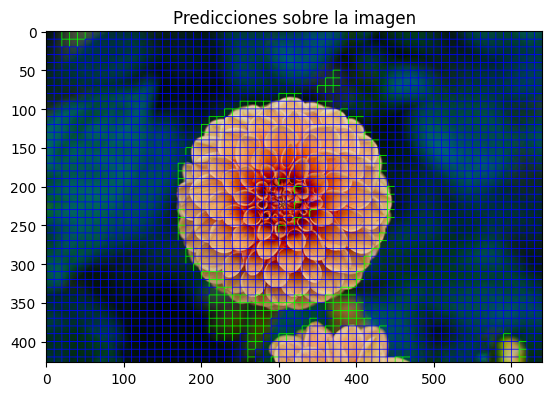

In [8]:
# El siguiente código nos muestra la imagen seleccionada con la cuadrícula previamente trazada
# y algunos patrones detectados por la SVM (basado en el color)
# Esto nos puede ayudar para detectar objetos en imágenes
import cv2
def visualize_predictions(image, model, grid_size=(10, 10)):
    features = extract_features(image, grid_size)
    features = scaler.transform(features)
    predictions = model.predict(features)
    height, width, _ = image.shape
    result = image.copy()
    for idx, (row, col) in enumerate([(i, j) for i in range(0, height, grid_size[0]) for j in range(0, width, grid_size[1])]):
        color = (0, 255, 0) if predictions[idx] == 0 else (0, 0, 255)
        cv2.rectangle(result, (col, row), (col + grid_size[1], row + grid_size[0]), color, 1)
    plt.imshow(result)
    plt.title('Predicciones sobre la imagen')
    plt.show()

# Visualizar predicciones en la primera imagen
visualize_predictions(images[1], svm)